<font color='#d90fa0'><b>ASESOR DE MODA - PREDICCIÓN DE PANTALON MUJER</b></font>

Para el análisis del asesor de moda se generará el archivo resultante de la predicción la prenda tipo PANTALON_MUJER por tipo de cuerpo en ésta sección.

Agregar librerías

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Lectura y revisión de archivo de datos

In [2]:
#Leer archivo
datoscsv = pd.read_csv("C:\\Users\\Syslan\\Curso AI\\DemoDayAsesorModa\\dataset\\DSPantWoman.csv",encoding='unicode_escape')
print(datoscsv.shape)

(80, 14)


In [3]:
#Reviso estructura de información
datoscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SEXO          80 non-null     object
 1   IDSEXO        80 non-null     int64 
 2   TIPOCUERPO    80 non-null     object
 3   IDTIPOCUERPO  80 non-null     int64 
 4   TIPOPRENDA    80 non-null     object
 5   IDTIPOPRENDA  80 non-null     int64 
 6   MODELO        80 non-null     object
 7   IDMODELO      80 non-null     int64 
 8   LONGITUD      80 non-null     object
 9   CORTE         80 non-null     object
 10  BOLSILLOS     80 non-null     object
 11  ELASTICOS     80 non-null     object
 12  ESTATURA      80 non-null     object
 13  PRENDAAPTA    80 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 8.9+ KB


In [4]:
#Reviso datos de archivo desde cabecera
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPOPRENDA,IDTIPOPRENDA,MODELO,IDMODELO,LONGITUD,CORTE,BOLSILLOS,ELASTICOS,ESTATURA,PRENDAAPTA
0,MUJER,1,Triangulo Invertido,1,PANTALON,2,RECTO,1,LARGO,NORMAL,POCO,NO,TODAS,1
1,MUJER,1,Triangulo Invertido,1,PANTALON,2,PITILLO,2,LARGO,AJUSTADO,NADA,A VECES,TODAS,0
2,MUJER,1,Triangulo Invertido,1,PANTALON,2,PATA DE ELEFANTE,3,LARGO,HOLGADO,POCO,NO,ALTA,1
3,MUJER,1,Triangulo Invertido,1,PANTALON,2,BOMBACHO,4,MEDIO,HOLGADO,POCO,SI,ALTA,0
4,MUJER,1,Triangulo Invertido,1,PANTALON,2,CARGO,5,LARGO,HOLGADO,MUCHO,A VECES,TODAS,1


<b>Análisis de datos</b>

In [5]:
#armo mi dataset temporal que me ayudará a cambiar los valores string por valores numéricos
FullDataSet = [datoscsv]

1. Reviso si existen datos nulos o vacíos

In [6]:
#reviso los campos en busca de valores Nulos (Nan)
campoConNulos = pd.concat([datoscsv.isnull().sum()], axis=1, keys=['DATASET']) 
print(campoConNulos[campoConNulos.sum(axis=1) > 0])

Empty DataFrame
Columns: [DATASET]
Index: []


**Nota:** No existen datos vacíos

2. Análisis sexo vs prendaapta

In [7]:
#analiza sexo vs prendaapta
datoscsv[['IDSEXO', 'PRENDAAPTA']].groupby(['IDSEXO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDSEXO,PRENDAAPTA
0,1,0.5


**Nota:** Existe relación entre el sexo y el campo prendaapta

3. Análisis tipo de cuerpo vs prendaapta

In [8]:
#analiza tipo de cuerpo vs prendaapta
datoscsv[['IDTIPOCUERPO', 'PRENDAAPTA']].groupby(['IDTIPOCUERPO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDTIPOCUERPO,PRENDAAPTA
1,2,0.8750
0,1,0.5625
4,5,0.4375
2,3,0.3125
3,4,0.3125


**Nota:** Existe relación entre tipo de cuerpo 1 y 2

4. Análisis de campo pantalon vs prendaapta

In [9]:
#analiza tipo de prenda vs prendaapta
datoscsv[['IDTIPOPRENDA', 'PRENDAAPTA']].groupby(['IDTIPOPRENDA'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDTIPOPRENDA,PRENDAAPTA
0,2,0.5


**Nota:** existe relación entre tipo de modelo y el campo prendaapta

5. Análisis de modelo de pantalon vs predaapta

In [10]:
#analiza tipo de prenda vs prendaapta
datoscsv[['IDMODELO', 'PRENDAAPTA']].groupby(['IDMODELO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDMODELO,PRENDAAPTA
0,1,0.8
2,3,0.8
8,9,0.8
9,10,0.8
5,6,0.6
10,11,0.6
14,15,0.6
3,4,0.4
4,5,0.4
6,7,0.4


**Nota:** si existe relación entre el modelo de pantalon y el campo prendaapta

6. Análisis de altura vs prendaapta. El campo altura posee valores tipo string, por lo que deben transformarse en campo entero.

In [11]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['LONGITUD'] == 'CORTO', 'LONGITUD'] = int(1)
    dataset.loc[ dataset['LONGITUD'] == "MEDIO", 'LONGITUD'] = int(2)
    dataset.loc[ dataset['LONGITUD'] == "LARGO", 'LONGITUD'] = int(3)

In [12]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPOPRENDA,IDTIPOPRENDA,MODELO,IDMODELO,LONGITUD,CORTE,BOLSILLOS,ELASTICOS,ESTATURA,PRENDAAPTA
0,MUJER,1,Triangulo Invertido,1,PANTALON,2,RECTO,1,3,NORMAL,POCO,NO,TODAS,1
1,MUJER,1,Triangulo Invertido,1,PANTALON,2,PITILLO,2,3,AJUSTADO,NADA,A VECES,TODAS,0
2,MUJER,1,Triangulo Invertido,1,PANTALON,2,PATA DE ELEFANTE,3,3,HOLGADO,POCO,NO,ALTA,1
3,MUJER,1,Triangulo Invertido,1,PANTALON,2,BOMBACHO,4,2,HOLGADO,POCO,SI,ALTA,0
4,MUJER,1,Triangulo Invertido,1,PANTALON,2,CARGO,5,3,HOLGADO,MUCHO,A VECES,TODAS,1


In [13]:
#longitud vs prendaapta
datoscsv[['LONGITUD', 'PRENDAAPTA']].groupby(['LONGITUD'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,LONGITUD,PRENDAAPTA
2,3,0.56
1,2,0.45
0,1,0.30


**Nota:** La longitud si tiene relación con el campo prendaapta en pantalon de longitud largo

7. Análisis de relación de tipo de cuerpo, longitud y prendaapta

In [14]:
#tipo de cuerpo, altura y prendaapta
datoscsv[['IDTIPOCUERPO','LONGITUD','PRENDAAPTA']].groupby(['IDTIPOCUERPO','LONGITUD'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,LONGITUD,PRENDAAPTA
12,5,1,0.00
13,5,2,0.25
14,5,3,0.60
9,4,1,0.00
10,4,2,0.00
11,4,3,0.50
6,3,1,0.00
7,3,2,0.75
8,3,3,0.20
3,2,1,1.00


**Nota:** El campo longitud si tiene relación directa contra el campo tipo de cuerpo y prendaapta

C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


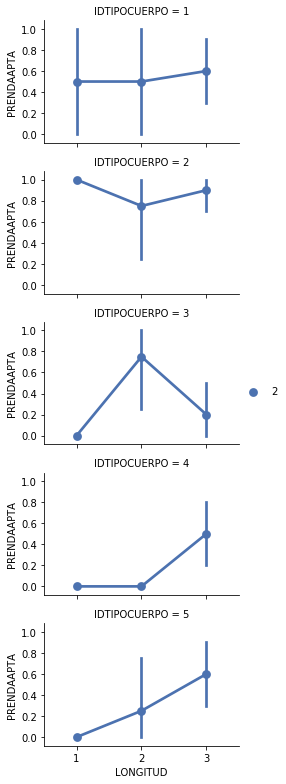

In [15]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'LONGITUD', 'PRENDAAPTA', 'IDTIPOPRENDA', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con la LONGITUD y el campo prendaapta

8. Análisis de forma vs prendaapta. El campo forma posee valores tipo string, por lo que deben transformarse en campo entero.

In [16]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['CORTE'] == 'AJUSTADO', 'CORTE'] = int(1)
    dataset.loc[ dataset['CORTE'] == "NORMAL", 'CORTE'] = int(2)
    dataset.loc[ dataset['CORTE'] == "HOLGADO", 'CORTE'] = int(3)
    

In [17]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPOPRENDA,IDTIPOPRENDA,MODELO,IDMODELO,LONGITUD,CORTE,BOLSILLOS,ELASTICOS,ESTATURA,PRENDAAPTA
0,MUJER,1,Triangulo Invertido,1,PANTALON,2,RECTO,1,3,2,POCO,NO,TODAS,1
1,MUJER,1,Triangulo Invertido,1,PANTALON,2,PITILLO,2,3,1,NADA,A VECES,TODAS,0
2,MUJER,1,Triangulo Invertido,1,PANTALON,2,PATA DE ELEFANTE,3,3,3,POCO,NO,ALTA,1
3,MUJER,1,Triangulo Invertido,1,PANTALON,2,BOMBACHO,4,2,3,POCO,SI,ALTA,0
4,MUJER,1,Triangulo Invertido,1,PANTALON,2,CARGO,5,3,3,MUCHO,A VECES,TODAS,1


In [18]:
#analiza forma vs prendaapta
datoscsv[['CORTE','PRENDAAPTA']].groupby(['CORTE'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,CORTE,PRENDAAPTA
2,3,0.600000
1,2,0.466667
0,1,0.400000


**Nota:** La forma de la prenda si tiene relación con el campo prendaapta.

In [19]:
#analiza tipo de cuerpo,forma,prendaapta
datoscsv[['IDTIPOCUERPO','CORTE','PRENDAAPTA']].groupby(['IDTIPOCUERPO','CORTE'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,CORTE,PRENDAAPTA
12,5,1,0.000000
13,5,2,0.333333
14,5,3,0.833333
9,4,1,0.000000
10,4,2,0.333333
11,4,3,0.500000
6,3,1,1.000000
7,3,2,0.166667
8,3,3,0.000000
3,2,1,0.500000


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


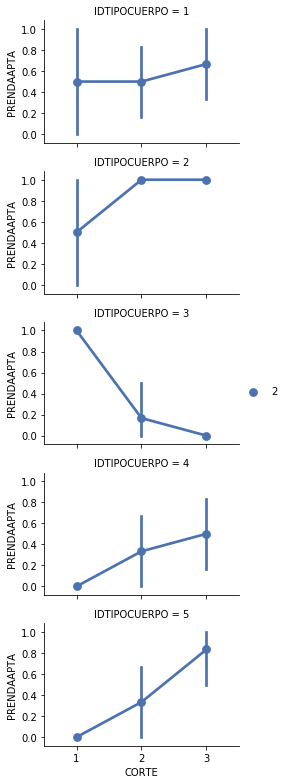

In [20]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'CORTE', 'PRENDAAPTA', 'IDTIPOPRENDA', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con el corte de la prenda y el campo prendaapta.

9. Análisis de pliegues vs prendaapta. El campo bolsillos posee valores tipo string, por lo que deben transformarse en campo entero.

In [21]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['BOLSILLOS'] == 'NADA', 'BOLSILLOS'] = 0
    dataset.loc[ dataset['BOLSILLOS'] == "POCO", 'BOLSILLOS'] = 1
    dataset.loc[ dataset['BOLSILLOS'] == 'MUCHO', 'BOLSILLOS'] = 2

In [22]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPOPRENDA,IDTIPOPRENDA,MODELO,IDMODELO,LONGITUD,CORTE,BOLSILLOS,ELASTICOS,ESTATURA,PRENDAAPTA
0,MUJER,1,Triangulo Invertido,1,PANTALON,2,RECTO,1,3,2,1,NO,TODAS,1
1,MUJER,1,Triangulo Invertido,1,PANTALON,2,PITILLO,2,3,1,0,A VECES,TODAS,0
2,MUJER,1,Triangulo Invertido,1,PANTALON,2,PATA DE ELEFANTE,3,3,3,1,NO,ALTA,1
3,MUJER,1,Triangulo Invertido,1,PANTALON,2,BOMBACHO,4,2,3,1,SI,ALTA,0
4,MUJER,1,Triangulo Invertido,1,PANTALON,2,CARGO,5,3,3,2,A VECES,TODAS,1


In [23]:
#analiza pliegues vs prendaapta
datoscsv[['BOLSILLOS','PRENDAAPTA']].groupby(['BOLSILLOS'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,BOLSILLOS,PRENDAAPTA
1,1,0.566667
2,2,0.400000
0,0,0.200000


**Nota:** Los pliegues de la prenda no tienen mayor peso relacionado directamente con el campo prendaapta

In [24]:
#analiza tipo de cuerpo,pliegues,prendaapta
datoscsv[['IDTIPOCUERPO','BOLSILLOS','PRENDAAPTA']].groupby(['IDTIPOCUERPO','BOLSILLOS'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,BOLSILLOS,PRENDAAPTA
12,5,0,0.000000
13,5,1,0.500000
14,5,2,0.500000
9,4,0,0.000000
10,4,1,0.416667
11,4,2,0.000000
6,3,0,1.000000
7,3,1,0.250000
8,3,2,0.000000
3,2,0,0.000000


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


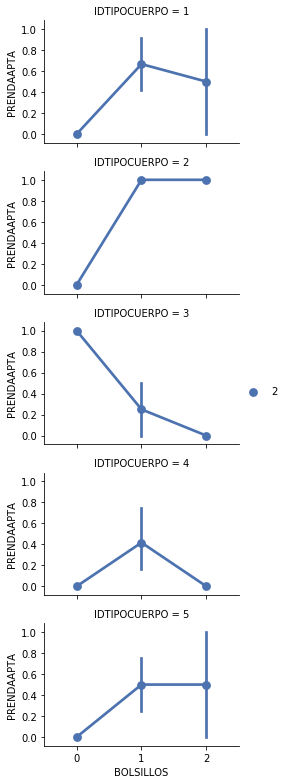

In [25]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'BOLSILLOS', 'PRENDAAPTA', 'IDTIPOPRENDA', palette='deep')
grid.add_legend()
##################################3

**Nota:** El tipo de cuerpo si tiene relación con los BOLSILLOS de la prenda y el campo prendaapta.

10. Análisis de ELASTICOS vs prendaapta. El campo vuelos posee valores tipo string, por lo que deben transformarse en campo entero.

In [26]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['ELASTICOS'] == 'SI', 'ELASTICOS'] = 1
    dataset.loc[ dataset['ELASTICOS'] == "NO", 'ELASTICOS'] = 0
    dataset.loc[ dataset['ELASTICOS'] == "A VECES", 'ELASTICOS'] = 2

In [27]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPOPRENDA,IDTIPOPRENDA,MODELO,IDMODELO,LONGITUD,CORTE,BOLSILLOS,ELASTICOS,ESTATURA,PRENDAAPTA
0,MUJER,1,Triangulo Invertido,1,PANTALON,2,RECTO,1,3,2,1,0,TODAS,1
1,MUJER,1,Triangulo Invertido,1,PANTALON,2,PITILLO,2,3,1,0,2,TODAS,0
2,MUJER,1,Triangulo Invertido,1,PANTALON,2,PATA DE ELEFANTE,3,3,3,1,0,ALTA,1
3,MUJER,1,Triangulo Invertido,1,PANTALON,2,BOMBACHO,4,2,3,1,1,ALTA,0
4,MUJER,1,Triangulo Invertido,1,PANTALON,2,CARGO,5,3,3,2,2,TODAS,1


In [28]:
#analiza ELASTICOS vs prendaapta
datoscsv[['ELASTICOS','PRENDAAPTA']].groupby(['ELASTICOS'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,ELASTICOS,PRENDAAPTA
0,0,0.657143
1,1,0.400000
2,2,0.366667


**Nota:** Los ELASTICOS de la prenda no tienen mayor peso relacionado directamente con el campo prendaapta

In [29]:
#tipo de cuerpo,vuelos,prendaapta
datoscsv[['IDTIPOCUERPO','ELASTICOS','PRENDAAPTA']].groupby(['IDTIPOCUERPO','ELASTICOS'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,ELASTICOS,PRENDAAPTA
12,5,0,0.714286
13,5,1,0.333333
14,5,2,0.166667
9,4,0,0.714286
10,4,1,0.000000
11,4,2,0.000000
6,3,0,0.142857
7,3,1,0.666667
8,3,2,0.333333
3,2,0,1.000000


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


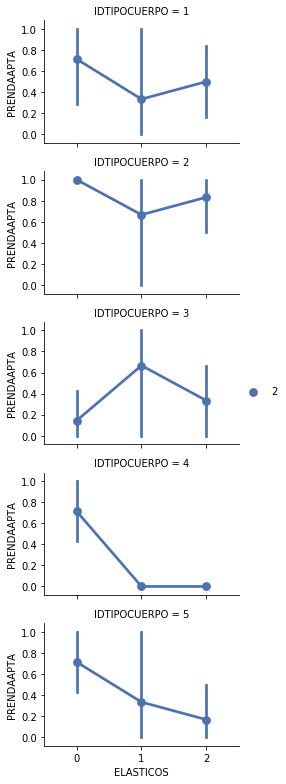

In [30]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'ELASTICOS', 'PRENDAAPTA', 'IDTIPOPRENDA', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con los ELASTICOS de la prenda y el campo prendaapta.

11. Análisis de capas vs prendaapta. El campo capas posee valores tipo string, por lo que deben transformarse en campo entero.

In [31]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['ESTATURA'] == 'ALTA', 'ESTATURA'] = int(1)
    dataset.loc[ dataset['ESTATURA'] == "TODAS", 'ESTATURA'] = int(0)

In [32]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPOPRENDA,IDTIPOPRENDA,MODELO,IDMODELO,LONGITUD,CORTE,BOLSILLOS,ELASTICOS,ESTATURA,PRENDAAPTA
0,MUJER,1,Triangulo Invertido,1,PANTALON,2,RECTO,1,3,2,1,0,0,1
1,MUJER,1,Triangulo Invertido,1,PANTALON,2,PITILLO,2,3,1,0,2,0,0
2,MUJER,1,Triangulo Invertido,1,PANTALON,2,PATA DE ELEFANTE,3,3,3,1,0,1,1
3,MUJER,1,Triangulo Invertido,1,PANTALON,2,BOMBACHO,4,2,3,1,1,1,0
4,MUJER,1,Triangulo Invertido,1,PANTALON,2,CARGO,5,3,3,2,2,0,1


In [33]:
#analiza capas vs prendaapta
datoscsv[['ESTATURA','PRENDAAPTA']].groupby(['ESTATURA'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,ESTATURA,PRENDAAPTA
1,1,0.575
0,0,0.425


**Nota:** Las estatura de la prenda si tienen relación con el campo prendaapta

In [34]:
#analiza tipos de cuerpo,capas,prendaapta
datoscsv[['IDTIPOCUERPO','ESTATURA','PRENDAAPTA']].groupby(['IDTIPOCUERPO','ESTATURA'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,ESTATURA,PRENDAAPTA
8,5,0,0.250
9,5,1,0.625
6,4,0,0.250
7,4,1,0.375
4,3,0,0.250
5,3,1,0.375
2,2,0,0.875
3,2,1,0.875
0,1,0,0.500
1,1,1,0.625


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


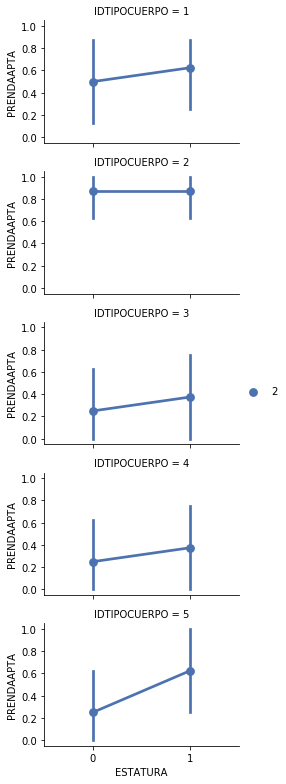

In [35]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'ESTATURA', 'PRENDAAPTA', 'IDTIPOPRENDA', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con las capas de la prenda y el campo prendaapta.

12. Limpieza de campos tipo string de dataset de análisis final

In [36]:
#elimino campos tipo string de dataset
datoscsv = datoscsv.drop(['SEXO', 'TIPOCUERPO', 'TIPOPRENDA', 'MODELO'], axis=1)

In [37]:
#reviso tipo de datos final
datoscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IDSEXO        80 non-null     int64 
 1   IDTIPOCUERPO  80 non-null     int64 
 2   IDTIPOPRENDA  80 non-null     int64 
 3   IDMODELO      80 non-null     int64 
 4   LONGITUD      80 non-null     object
 5   CORTE         80 non-null     object
 6   BOLSILLOS     80 non-null     object
 7   ELASTICOS     80 non-null     object
 8   ESTATURA      80 non-null     object
 9   PRENDAAPTA    80 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 6.4+ KB


**Definición de Variables**

In [38]:
#revisión de columnas de dataset
print(datoscsv.columns.values)

['IDSEXO' 'IDTIPOCUERPO' 'IDTIPOPRENDA' 'IDMODELO' 'LONGITUD' 'CORTE'
 'BOLSILLOS' 'ELASTICOS' 'ESTATURA' 'PRENDAAPTA']


In [39]:
#establecer dataset de variables a predecir
X_train = datoscsv.drop("PRENDAAPTA", axis=1)
Y_train = datoscsv["PRENDAAPTA"]
X_test = datoscsv.drop("IDTIPOCUERPO", axis=1).copy()

In [40]:
#presento filas y columnas de dataset a predecir
X_train.shape, Y_train.shape, X_test.shape

((80, 9), (80,), (80, 9))

**Análisis de Algoritmos**

Busco algoritmo que tenga mejor porcentaje de predicción

**Logistic Regression**

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

**SVC**

In [42]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

**KNeighborsClassifier**

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**GaussianNB**

In [44]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Perceptron**

In [45]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

**DecisionTreeClassifier**

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**RandomForestClassifier**

In [47]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [48]:
#Agrupo resultados en una variable para seleccionar el modelo que usaré para la predicción final
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_decision_tree]})
#Ordeno por resultado
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,80.00
2,Logistic Regression,70.00
4,Naive Bayes,66.25
0,Support Vector Machines,62.50
5,Perceptron,62.50


**Resultado:**

De los modelos analizados 2 se aplican mejor a la predicción pero elegiré para la aplicación final a <font color="green">Random Forest</font>

In [49]:
#genero archivo de resultados del modelo que será leído luego de la ejecución del botón click "Generar" de la aplicación
submission = pd.DataFrame({
        "IDMODELO": datoscsv["IDMODELO"],
        "IDTIPOCUERPO": datoscsv["IDTIPOCUERPO"],
        "PRENDAAPTA": Y_pred
    })
submission.to_csv("C:\\Users\\Syslan\\Curso AI\\DemoDayAsesorModa\\dataset\\DSPantalonmujer.csv", index=False)

print('Archivo generado')

Archivo generado
